In [7]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from utils import plotBodeMC, readPd, parallelZ, parallelABC
from scipy.optimize import curve_fit

df = readPd('L_HP.csv')
# reinterpret as float
df = df.astype(float)

f = df['Frecuencia'].values
Z_mod = df['|Z|'].values
Z_phase = df['Fase'].values

In [ ]:
def serialize(Z):
    return np.concatenate((Z.real, Z.imag))

[2.37324285e-03 1.14920738e+00 2.23380148e-13 5.19907026e+05]
R2:  0.9036643170056317


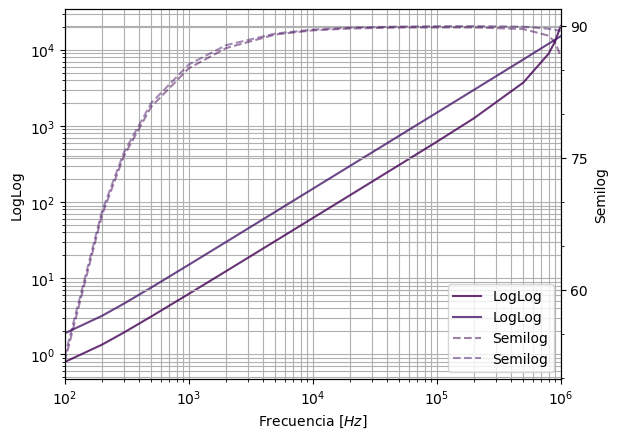

In [33]:
def Impedance(f, L, Rl, C, Rc):
    s = 1j*2*np.pi*f
    
    Z = s*L + Rl                       # R2 = 0.902     [0.00239613 1.18109748]
    # Z = s*L + Rl + parallelZ(1/(s*C), Rc)
    # Z = parallelZ(s*L + Rl, 1/(s*C) + Rc)
    # Z = 1/(s*C) + Rl + s*L  # ANDA BIEN
    # Z = parallelZ(1/(s*C), Rc) + Rl + s*L
    # Z = parallelZ(Rl + s*L, 1/(s*C) + Rc)  
    # Z = parallelZ(Rl + s*L, Rc + 1/(s*C)) 

    mod = np.abs(Z)
    phase = np.angle(Z, deg=True)
    return mod, phase

def opti_func(f, L, Rl, C, Rc):
    mod, phase = Impedance(f, L, Rl, C, Rc)
    return np.concatenate((mod, phase))


y_data = np.concatenate((Z_mod, Z_phase))

p0 = [0.00239613, 1.18109748, 8e-11, 3]
popt, pcov = curve_fit(opti_func, f, y_data, p0=p0, maxfev=100000)
print(popt)

# R^2
y_mean = np.mean(y_data)
SS_tot = np.sum((y_data - y_mean)**2)
SS_res = np.sum((y_data - opti_func(f, *popt))**2)
R2 = 1 - SS_res/SS_tot
print("R2: ", R2)

# Plot
mod, phase = Impedance(f, *popt)
plotBodeMC(f, loglog=[Z_mod, mod], semilog= [Z_phase, phase])